In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from src.arm import Arm
from src.algo.ttts import TTTS
from src.algo.ttei import TTEI
from src.algo.ttkg import TTKG
from src.algo.tttc import TTTC
from src.algo.ttebtc import TTEBTC
from src.algo.ttucb import TTUCB

### BEST ARM IDENTIFICATION

#### Variables

In [2]:
#algos = [TTTS, TTEI, TTKG, TTTC, TTEBTC, TTUCB]
algos = [TTEI]
reps = 100
confint = 0.9999
means = [1, 0.5, 0.1, 0.1, 0.1]
results = {}

In [3]:
np.random.seed(4199)

#### Run

In [4]:
all_iters = {}
all_pe = {}
all_sr = {}
all_cr = {}

for algo in algos:
    print(f"Running {algo} {'='*50}")
    
    iter = []
    pe = []
    sr = []
    cr = []

    for i in range(reps):
        print(f"Iteration {i}")
        arms = []
        for i in range(len(means)):
            arms.append(Arm(i+1, means[i]))
        result = algo(arms, True, False, confint).run()
        iter.append(result["final_iter"])
        pe.append(result["pe"])
        sr.append(result["sr"])
        cr.append(result["cr"])

    all_iters[algo] = sum(iter) / len(iter)
    all_pe[algo] = pe
    all_sr[algo] = sr
    all_cr[algo] = cr

Running <class 'src.algo.ttei.TTEI'> ==================================================
Iteration 0


TypeError: Metrics.update() missing 1 required positional argument: 'pulled_arm'

In [7]:
all_iters

{src.algo.ttei.TTEI: 256.5}

### PE, SR, CR

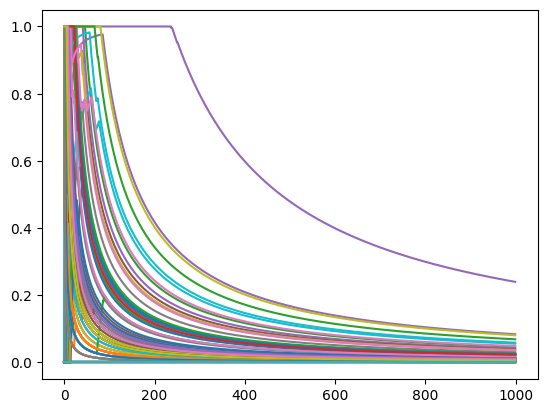

In [9]:
for line in all_pe[TTEI]:
    plt.plot(line)
plt.show()

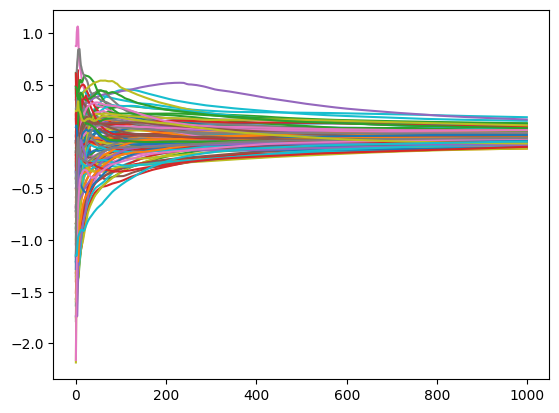

In [10]:
for line in all_sr[TTEI]:
    plt.plot(line)
plt.show()

In [7]:
all_pe

{src.algo.ttts.TTTS: [array([1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 0.9       ,
         0.81818182, 0.75      , 0.69230769, 0.64285714, 0.6       ,
         0.5625    , 0.52941176, 0.5       , 0.47368421, 0.45      ,
         0.42857143, 0.40909091, 0.39130435, 0.375     , 0.36      ,
         0.34615385, 0.33333333, 0.32142857, 0.31034483, 0.3       ,
         0.29032258, 0.28125   , 0.27272727, 0.26470588, 0.25714286,
         0.25      , 0.24324324, 0.23684211, 0.23076923, 0.225     ,
         0.2195122 , 0.21428571, 0.20930233, 0.20454545, 0.2       ,
         0.19565217, 0.19148936, 0.1875    , 0.18367347, 0.18      ,
         0.17647059, 0.17307692, 0.16981132, 0.16666667, 0.16363636,
         0.16071429, 0.15789474, 0.15517241, 0.15254237, 0.15      ,
         0.14754098, 0.14516129, 0.14285714, 0.140625  , 0.13846154,
         0.13636364, 0.13432836, 0.13235294, 0.13043478, 0.12857143,
         0.126